In [1]:
from keras.models import load_model
import cv2
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import tensorflow.keras.backend as K
import tensorflow as tf

In [2]:
# Define a custom loss function for Vgg19 UNet model

epsilon = 1e-5
smooth = 1

def tversky(y_true, y_pred):
    y_true_pos = K.flatten(y_true)
    y_pred_pos = K.flatten(y_pred)
    true_pos = K.sum(y_true_pos * y_pred_pos)
    false_neg = K.sum(y_true_pos * (1-y_pred_pos))
    false_pos = K.sum((1-y_true_pos)*y_pred_pos)
    alpha = 0.7
    return (true_pos + smooth)/(true_pos + alpha*false_neg + (1-alpha)*false_pos + smooth)

def focal_tversky(y_true,y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    pt_1 = tversky(y_true, y_pred)
    gamma = 0.75
    return K.pow((1-pt_1), gamma)

def tversky_loss(y_true, y_pred):
    return 1 - tversky(y_true,y_pred)

In [3]:
model = load_model("seg_model.h5",custom_objects={"focal_tversky":focal_tversky,"tversky":tversky,"tversky_loss":tversky_loss})

1/1 [==============================] - 1s 597ms/step


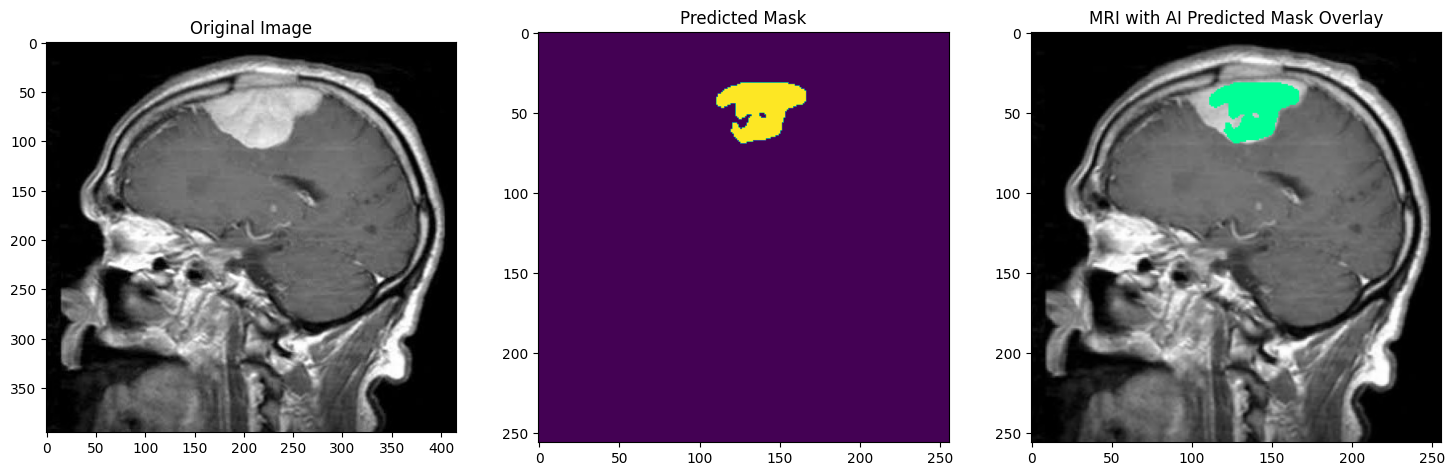

In [4]:
def predict_single_image(image_path, model_seg):
    # Read the image
    img = io.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Preprocess the image
    img_resized = cv2.resize(img, (256, 256))
    img_standardized = np.array(img_resized, dtype=np.float64)
    img_standardized -= img_standardized.mean()
    img_standardized /= img_standardized.std()
    
    # Make prediction
    X = np.empty((1, 256, 256, 3))
    X[0,] = img_standardized
    predict = model_seg.predict(X)
    predicted_mask = predict.squeeze().round()
    
    # Visualize original image, predicted mask, and MRI with AI predicted mask overlay
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title('Original Image')
    
    plt.subplot(1, 3, 2)
    plt.imshow(predicted_mask)
    plt.title('Predicted Mask')
    
    # Overlay predicted mask on original MRI image
    img_with_overlay = img_resized.copy()
    img_with_overlay[predicted_mask == 1] = (0, 255, 150)  # Overlay in green
    plt.subplot(1, 3, 3)
    plt.imshow(img_with_overlay)
    plt.title('MRI with AI Predicted Mask Overlay')
    
    plt.show()

# Example usage:
image_path = "Te-me_0043.jpg"
predict_single_image(image_path, model)


1/1 [==============================] - 1s 837ms/step


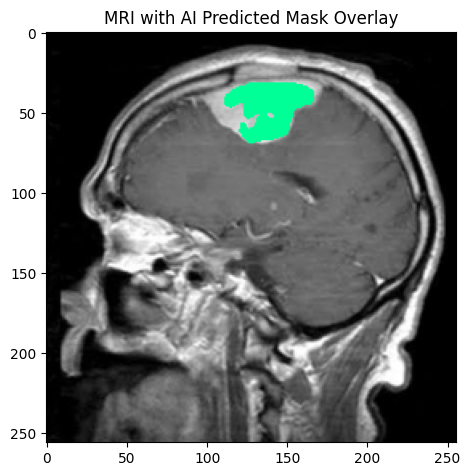

In [4]:
def predict_single_image(image_path, model_seg):
    # Read the image
    img = io.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Preprocess the image
    img_resized = cv2.resize(img, (256, 256))
    img_standardized = np.array(img_resized, dtype=np.float64)
    img_standardized -= img_standardized.mean()
    img_standardized /= img_standardized.std()
    
    # Make prediction
    X = np.empty((1, 256, 256, 3))
    X[0,] = img_standardized
    predict = model_seg.predict(X)
    predicted_mask = predict.squeeze().round()
    
    # Visualize original image, predicted mask, and MRI with AI predicted mask overlay
    plt.figure(figsize=(18, 6))
 
    
    # Overlay predicted mask on original MRI image
    img_with_overlay = img_resized.copy()
    img_with_overlay[predicted_mask == 1] = (0, 255, 150)  # Overlay in green
    plt.subplot(1, 3, 3)
    plt.imshow(img_with_overlay)
    plt.title('MRI with AI Predicted Mask Overlay')
    
    plt.show()

# Example usage:
image_path = "Te-me_0043.jpg"
predict_single_image(image_path, model)
